In [2]:
import os
import json
import openslide

import pandas
import numpy as n
import seaborn as sns
from itertools import chain
import matplotlib.pyplot as plt

import PySlide as pys

0.9.0


In [3]:
path = 'images/14.90610 C L2.11.json'
labels = {'GC':0}
file_type = 'json'
keys = ['GC']

In [4]:
ann=pys.Annotations(path, file_type)

In [5]:
annotations = ann.generate_annotations(labels)

### PySlide

In [6]:
slide = pys.Slide('images/14.90610 C L2.11.ndpi',border='draw',annotations=annotations)

In [7]:
slide.save('test.png',(2000,2000))

In [8]:
x = slide.slide_mask((2000,2000))

In [9]:
slide.save('masktest.png',(2000,2000), True)

######NEED TO CHECK WHY MASK IS SQUASHED#######

In [10]:
region, mask = slide.generate_region(mag=4, scale_border=True, factor=256)

x_size:768
y_size:768


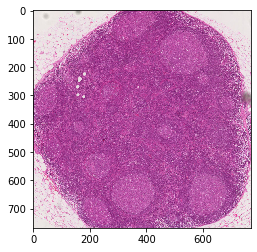

In [11]:
plt.imshow(region)

### Patching

In [12]:
patches = pys.Patching(slide, annotations, mag_level=4)

In [13]:
import time

start_time = time.time()
print(patches.generate_patches(64,'focus'))
print("--- %s seconds ---" % (time.time() - start_time))

37
--- 0.3984701633453369 seconds ---


In [14]:
len(patches.masks)

37

In [15]:
patches.save('images', True)

[Errno 17] File exists: 'images/images'
[Errno 17] File exists: 'images/masks'


In [ ]:
x = openslide.OpenSlide('images/14.90610 C L2.11.ndpi')

In [3]:
patch=x.read_region((12016,25273),4,(256,256))

NameError: name 'x' is not defined

In [95]:
import xml.etree.ElementTree as ET

In [96]:
xmlstring='U_100188_15_B_NA_15_L1.xml'

In [97]:
tree=ET.parse(xmlstring)
root=tree.getroot()

In [98]:
children = root.getchildren()

/usr/local/Cellar/python@3.7/3.7.9/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  """Entry point for launching an IPython kernel.


In [99]:
tree = ET.parse(xmlstring)
root = tree.getroot()
pixelSpacing = float(root.get('MicronsPerPixel'))

labels = {n.attrib['Name']: n[1].findall('Region') for n in root}
labelAreas = {}

In [100]:
for a in regions:

    region = {}
    for r in regions[a]:
        iD = int(r.get('Id'))
        area = r.attrib['AreaMicrons']
        length = r.attrib['LengthMicrons']
        vertices = r[1].findall('Vertex')
        f = lambda x: (int(float(x.attrib['X'])), int(float(x.attrib['Y'])))
        coords = list(map(f, vertices))
        region[iD] = dict(zip(('area', 'length', 'coords'), (area, length, coords)))
    labelAreas[a] = region

In [112]:
annotations

{'': {0: [(16526, 9382), (65372, 9382), (65372, 30671), (16526, 30671)]},
 'FOLLICLE': {0: [(20942, 24654),
   (20908, 24654),
   (20891, 24654),
   (20875, 24654),
   (20841, 24654),
   (20807, 24654),
   (20773, 24654),
   (20756, 24654),
   (20723, 24654),
   (20672, 24654),
   (20655, 24654),
   (20638, 24654),
   (20621, 24654),
   (20605, 24654),
   (20588, 24654),
   (20571, 24654),
   (20554, 24654),
   (20520, 24654),
   (20503, 24654),
   (20470, 24654),
   (20453, 24671),
   (20419, 24671),
   (20402, 24688),
   (20385, 24688),
   (20351, 24722),
   (20318, 24722),
   (20284, 24739),
   (20250, 24756),
   (20250, 24773),
   (20233, 24773),
   (20200, 24773),
   (20149, 24789),
   (20132, 24823),
   (20115, 24823),
   (20081, 24840),
   (20065, 24857),
   (20031, 24874),
   (19997, 24874),
   (19997, 24891),
   (19980, 24908),
   (19930, 24924),
   (19879, 24941),
   (19845, 24975),
   (19795, 24992),
   (19761, 24992),
   (19744, 25009),
   (19710, 25026),
   (19693, 25043),

In [16]:
def oneHotToMask(onehot):
    nClasses =  onehot.shape[-1]
    idx = tf.argmax(onehot, axis=-1)
    colors = sns.color_palette('hls', nClasses)
    multimask = tf.gather(colors, idx)
    multimask = np.where(multimask[:,:,:]==colors[0], 0, multimask[:,:,:])
    
    return multimask

In [ ]:
import numpy as np

one=np.ones((60,60))
two=np.ones((60,60))*2
three=np.ones((60,60))*3

test=np.hstack([one,two,three])

In [ ]:
import tensorflow as tf

colors = sns.color_palette('hls', 3)

np.take_along_axis(test, colors)


#multimask = tf.gather(colors, test)
#multimask = np.where(multimask[:,:,:]==colors[0], 0, multimask[:,:,:])